# Python数据处理 PCA/ZCA 白化

+ 参考材料 [PCA](http://ufldl.stanford.edu/wiki/index.php/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90)、[白化](http://ufldl.stanford.edu/wiki/index.php/%E7%99%BD%E5%8C%96) 以及一份别人的课后作业答案 [UFLDL教程答案(3):Exercise:PCA_in_2D&PCA_and_Whitening](http://blog.csdn.net/u012816943/article/details/50274805)
+ 与参考材料中实现的区别在于：参考材料中一列表示一个样本，在我的代码中一行表示一个样本
+ 基于课后练习的数据对 PCA/ZCA白化 进行代码说明

## 课后练习
+ PCA课后练习 http://ufldl.stanford.edu/wiki/index.php/Exercise:PCA_in_2D
+ PCA及白化课后练习 http://ufldl.stanford.edu/wiki/index.php/Exercise:PCA_and_Whitening

### PCA, PCA whitening and ZCA whitening in 2D 

### Step 0: Load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

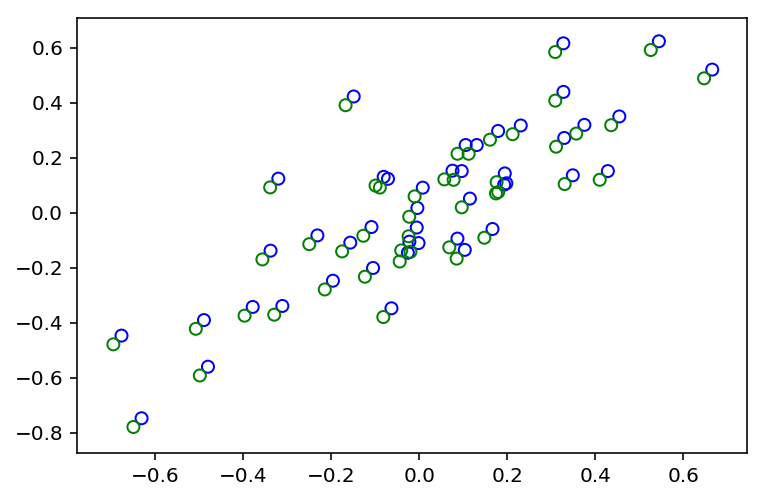

In [2]:
x = np.loadtxt('pca_2d/pcaData.txt')
# 转置数据，符合我们的代码
x = x.T

plt.scatter(x[:, 0], x[:, 1], marker='o', color='', edgecolors='b')

# 零均值化
x -= np.mean(x, axis=0)

# plot data
plt.scatter(x[:, 0], x[:, 1], marker='o', color='', edgecolors='g')
plt.show()

### Step 1: Implement PCA

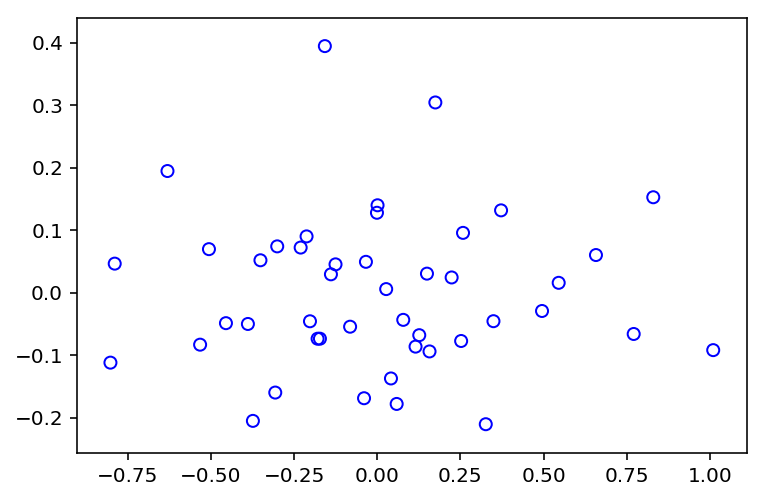

In [3]:
cov = np.dot(x.T, x) / x.shape[0]
U,S,V = np.linalg.svd(cov)

xRot = np.dot(x, U.T)

# Check xRot
plt.scatter(xRot[:, 0], xRot[:, 1], marker='o', color='', edgecolors='b')
plt.show()

### Step 2:Dimension reduce and replot 

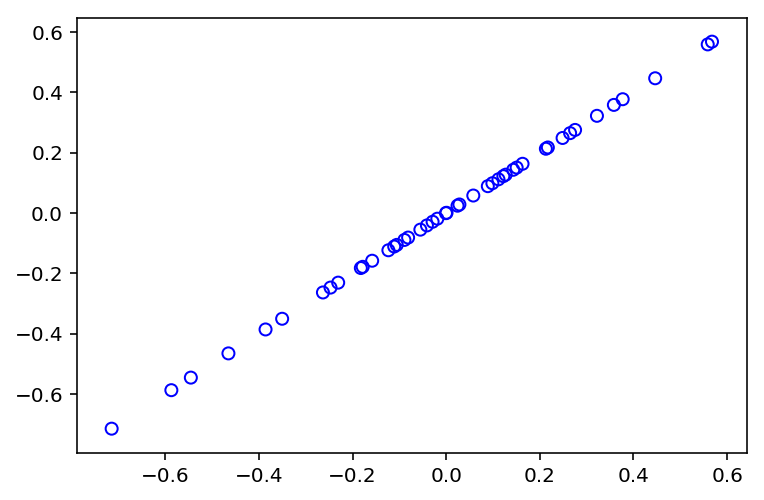

In [4]:
k = 1
xReduce = np.dot(x,U[:,0:k])
xHat = np.concatenate((xReduce, np.zeros(shape=(x.shape[0], x.shape[1] - k))), axis=1)
xHat = xHat.dot(U.T)
plt.scatter(xHat[:, 0], xHat[:, 1], marker='o', color='', edgecolors='b')

### Step 3: PCA Whitening 

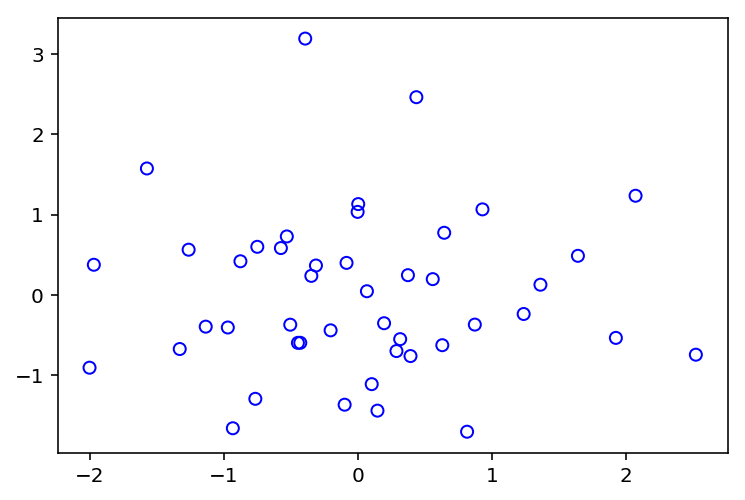

In [5]:
e = 1e-5
xPCAwhite =  xRot * (np.diag(1./np.sqrt(np.diag(S)+e)))
plt.scatter(xPCAwhite[:,0], xPCAwhite[:,1],marker='o',color='', edgecolors='b')

###  Step 4: ZCA Whitening 

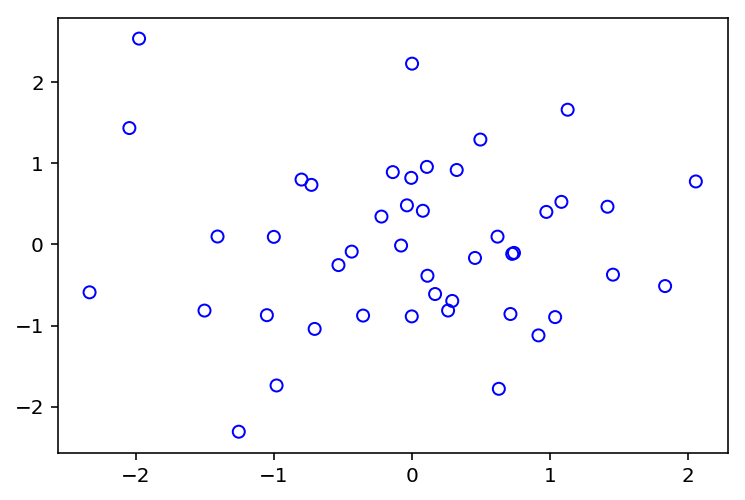

In [6]:
xZCAwhite = xPCAwhite.dot(U)
plt.scatter(xZCAwhite[:,0], xZCAwhite[:,1],marker='o', color='', edgecolors='b')

###  PCA and Whitening on natural images 

###  Step 0: Prepare data 

#### Step 0a: Load data 

In [7]:
from scipy.io import loadmat

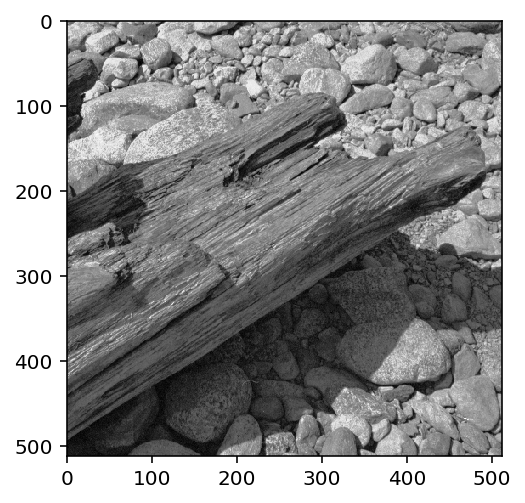

In [8]:
# Load data
data = loadmat('pca_exercise/IMAGES_RAW.mat')

# imgs.shape = (512,512,10) 共有10张图片，每张图片512*512
imgs = data['IMAGESr']

# 显示第一张图片
plt.imshow(imgs[:,:,0], cmap='gray')
plt.show()

In [9]:
# 生成块数据
patch_size = 12
num_patches = 10000
patches = np.zeros((num_patches, patch_size*patch_size))
p = 0
num_imgs = imgs.shape[2]
for im in range(num_imgs):
    num_samples = num_patches // num_imgs
    for s in range(num_samples):
        y = np.random.randint(imgs.shape[0] - patch_size + 1)
        x = np.random.randint(imgs.shape[1] - patch_size + 1)
        sample = imgs[y:y+patch_size, x:x+patch_size, im]
        patches[p,:] = np.reshape(sample, (patch_size*patch_size))
        p += 1

In [10]:
def display_patches(samples, num_rows, num_cols, padding_size):
    display_height = num_rows*patch_size + (num_rows+1)*padding_size
    display_width = num_cols*patch_size + (num_cols+1)*padding_size
    display_imgs = np.full((display_height, display_width), -1.0)  

    samples -= np.mean(samples)
    
    for i in range(samples.shape[0]):
        row = i // num_rows
        col = i % num_cols
        
        vertical_start = (col+1)*padding_size + col*patch_size
        vertical_end = vertical_start + patch_size
        
        horizontal_start = (row+1)*padding_size + row*patch_size
        horizontal_end = horizontal_start + patch_size 
        
        clim = np.max(np.abs(samples[i,:]))
        display_imgs[horizontal_start:horizontal_end, vertical_start:vertical_end] = np.reshape(samples[i,:]/clim, (patch_size, patch_size))
    
    plt.figure(figsize=(10,10))
    plt.imshow(display_imgs, cmap='gray')
    plt.show()

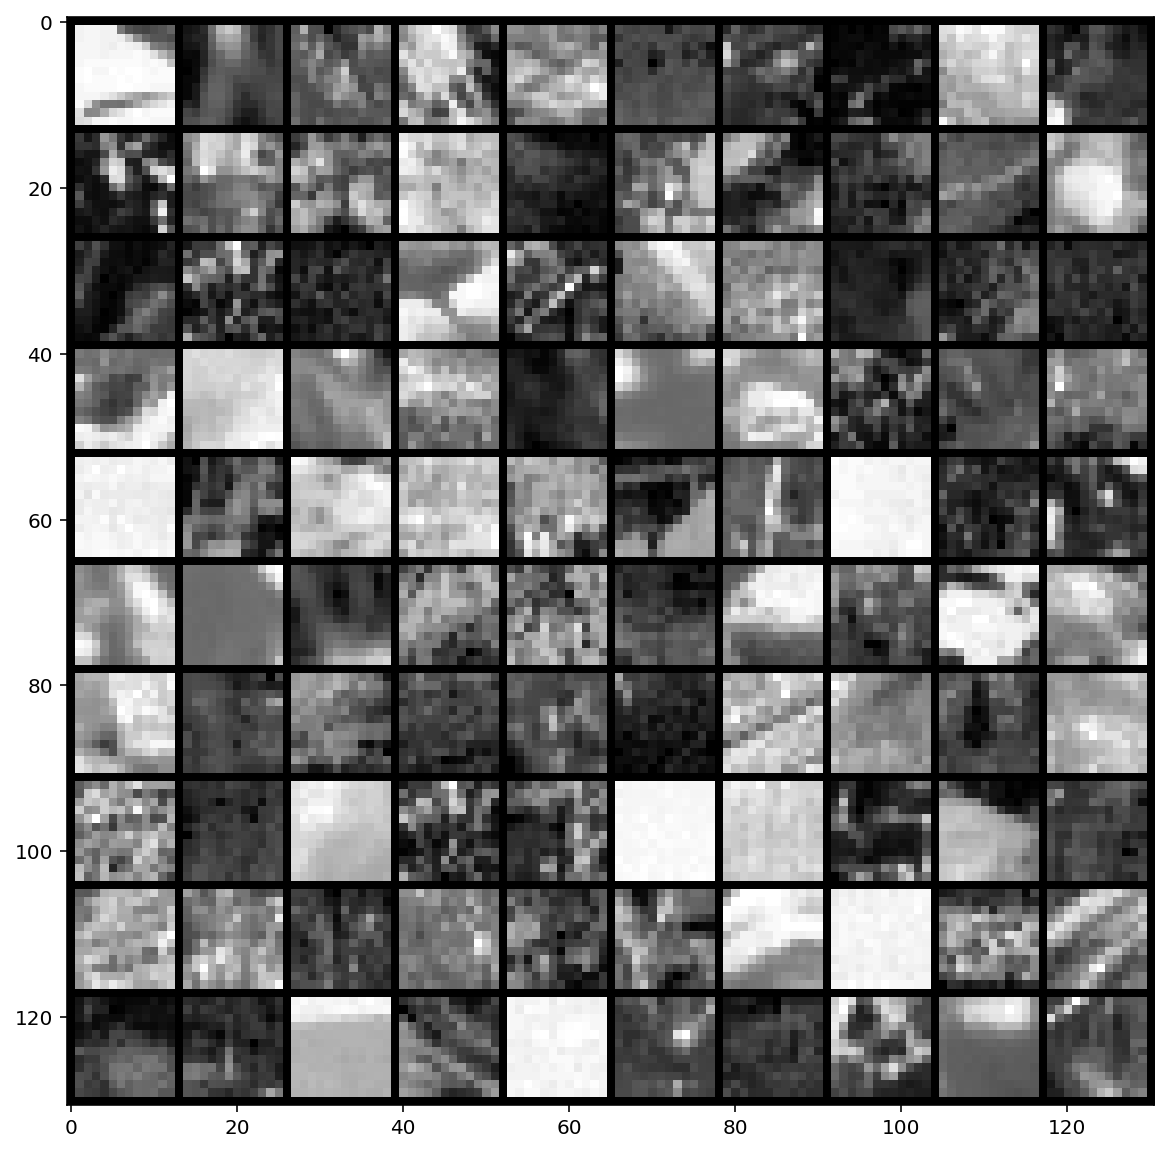

In [11]:
num_rows = 10
num_cols = 10
padding_size = 1
sample_index = np.random.randint(patches.shape[0], size=num_rows*num_cols)
samples = patches[sample_index, :]
display_patches(samples, num_rows, num_cols, padding_size)

#### Step 0b: Zero mean the data 

In [12]:
patches = (patches.T - np.mean(patches, axis=1)).T

### Step 1: Implement PCA 

#### Step 1a: Implement PCA 

In [13]:
cov = np.dot(patches.T, patches) / patches.shape[0]
U,S,V = np.linalg.svd(cov)

pRot = np.dot(patches, U.T)

#### Step 1b: Check covariance 

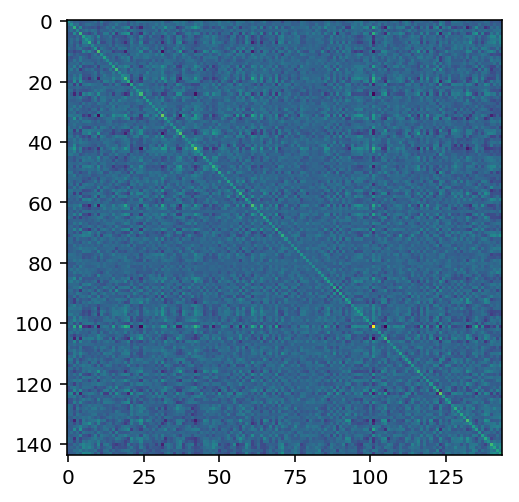

In [14]:
cov_rot = np.dot(pRot.T, pRot) / pRot.shape[0]
plt.imshow(cov_rot)
plt.show()

###  Step 2: Find number of components to retain 

In [15]:
# 找到k， 使得PCA能够保持99%的方差
k = 0
for i, p in enumerate((np.cumsum(S) / np.sum(S)), 1):
    if p > 0.99:
        k = i
        break

### Step 3: PCA with dimension reduction 

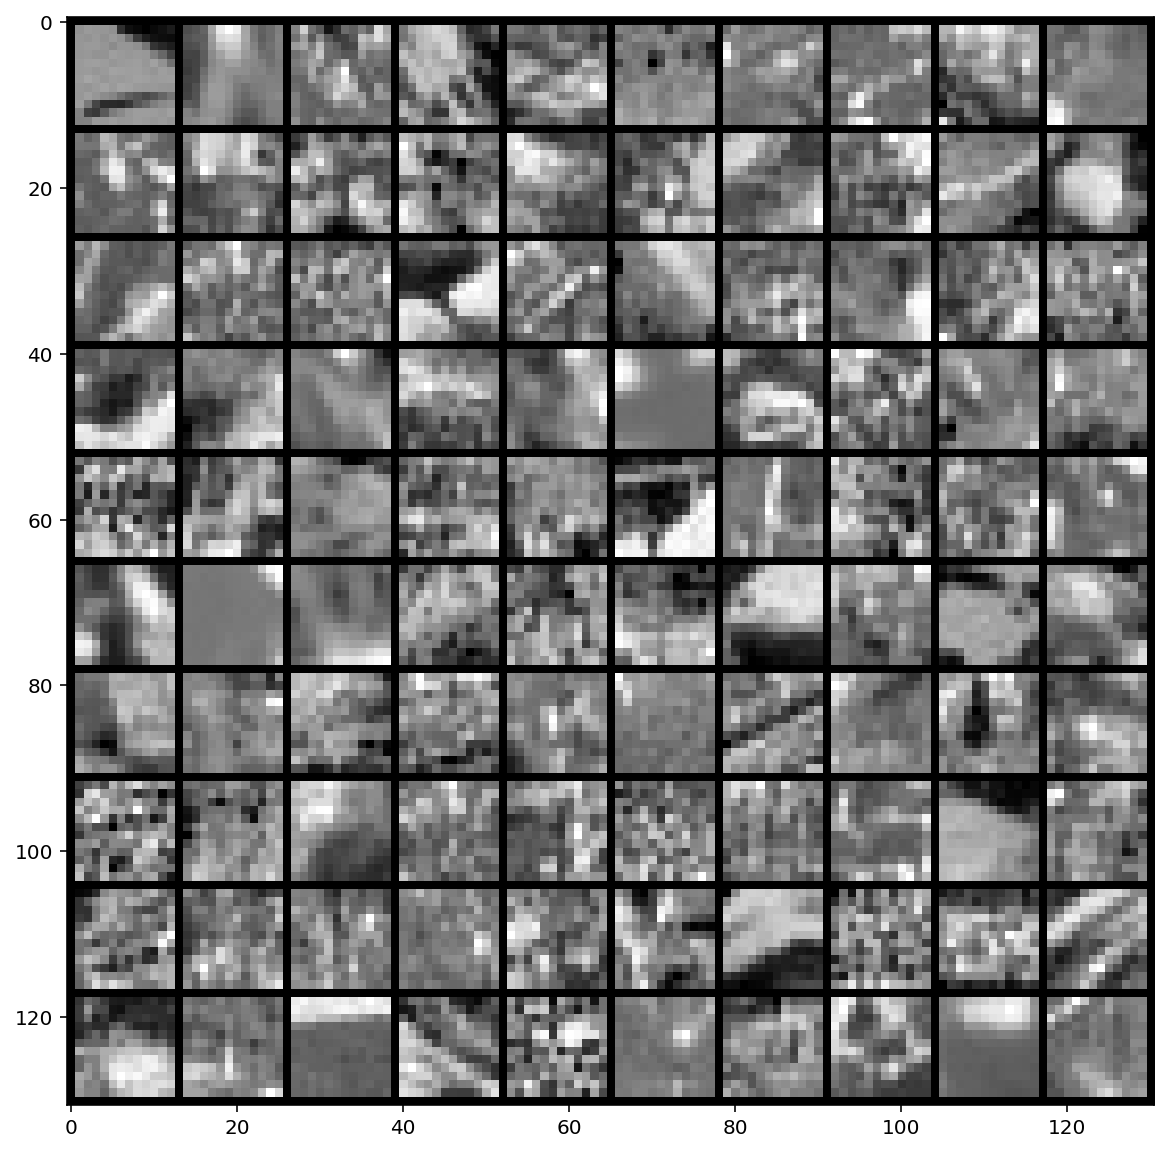

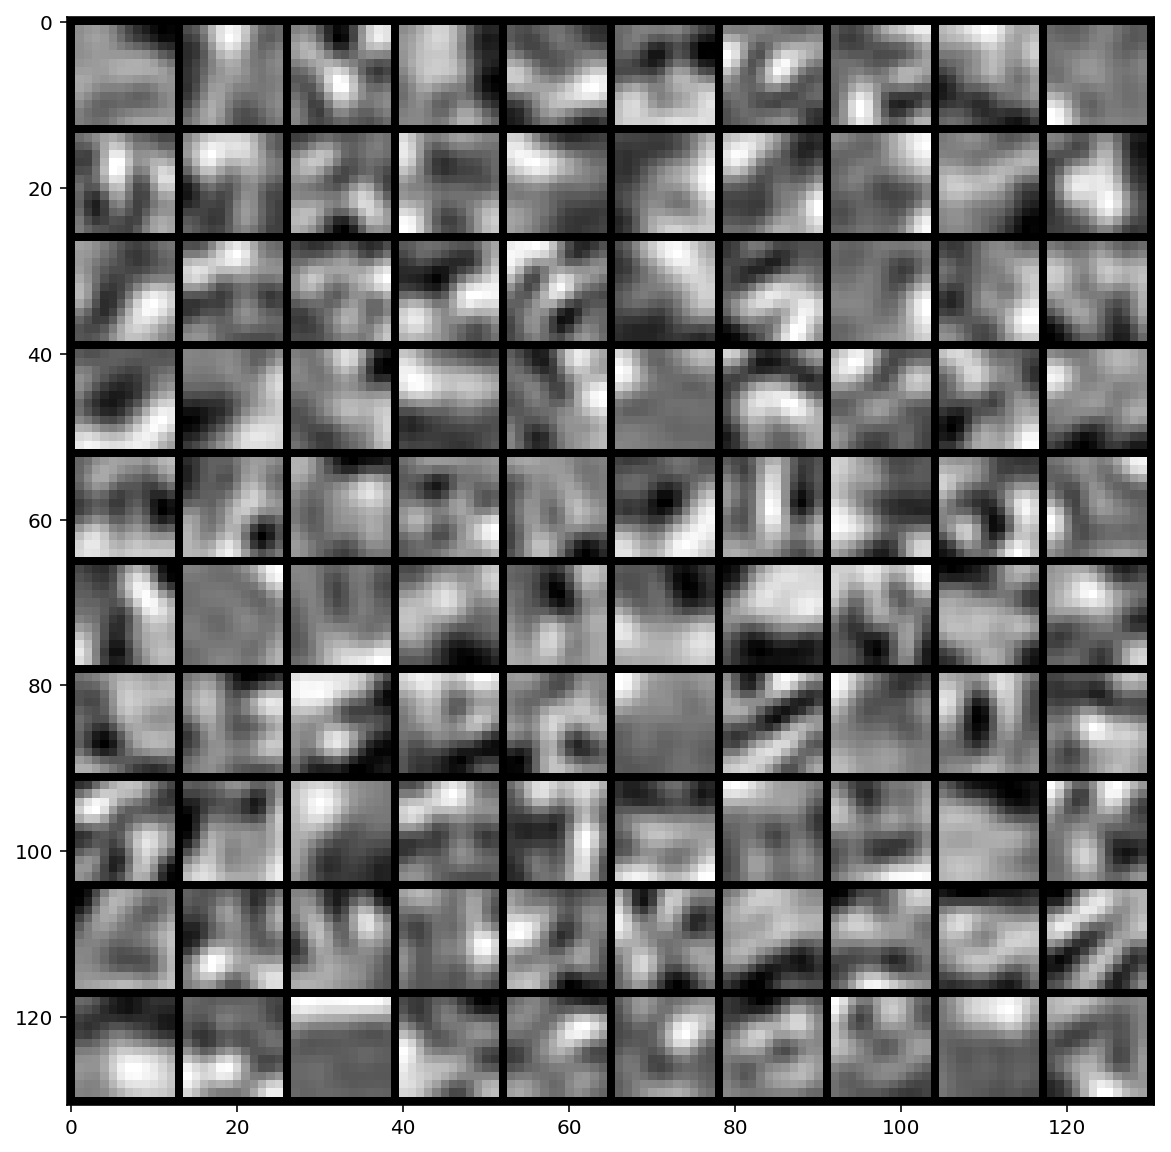

In [16]:
pReduce = np.dot(patches,U[:,:k])

# restore the images
pHat = np.concatenate((pReduce, np.zeros(shape=(patches.shape[0], patches.shape[1] - k))), axis=1)
pHat = pHat.dot(U.T)

samples = pHat[sample_index, :]
display_patches(samples, num_rows, num_cols, padding_size)

# 再减少维度
plt.figure()
low_dim_k = 20
pReduce = np.dot(patches,U[:,:low_dim_k])

# restore the images
pHat = np.concatenate((pReduce, np.zeros(shape=(patches.shape[0], patches.shape[1] - low_dim_k))), axis=1)
pHat = pHat.dot(U.T)

samples = pHat[sample_index, :]
display_patches(samples, num_rows, num_cols, padding_size)

### Step 4: PCA with whitening and regularization

####  Step 4a: Implement PCA with whitening and regularization 

#### Step 4b: Check covariance 

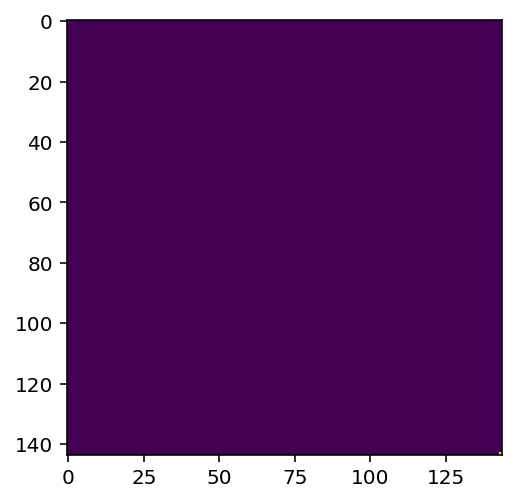

In [17]:
epsilon = 1e-9
pPCAwhite =  pRot * (np.diag(1./np.sqrt(np.diag(S)+epsilon)))

cov_PCAwhite = np.dot(pPCAwhite.T, pPCAwhite) / pPCAwhite.shape[0]
plt.imshow(cov_PCAwhite)
plt.show()

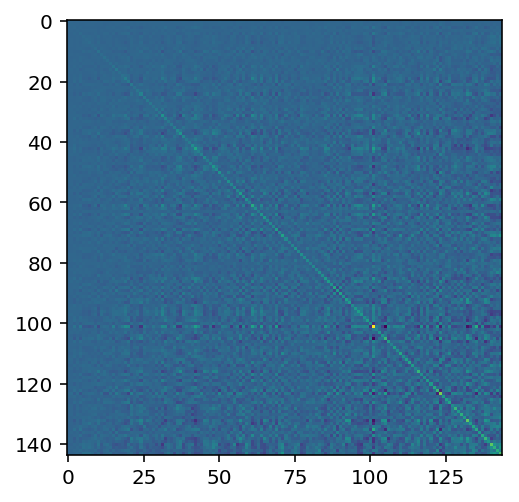

In [18]:
epsilon = 0.1
pPCAwhite =  pRot * (np.diag(1./np.sqrt(np.diag(S)+epsilon)))

cov_PCAwhite = np.dot(pPCAwhite.T, pPCAwhite) / pPCAwhite.shape[0]
plt.imshow(cov_PCAwhite)
plt.show()

### Step 5: ZCA whitening

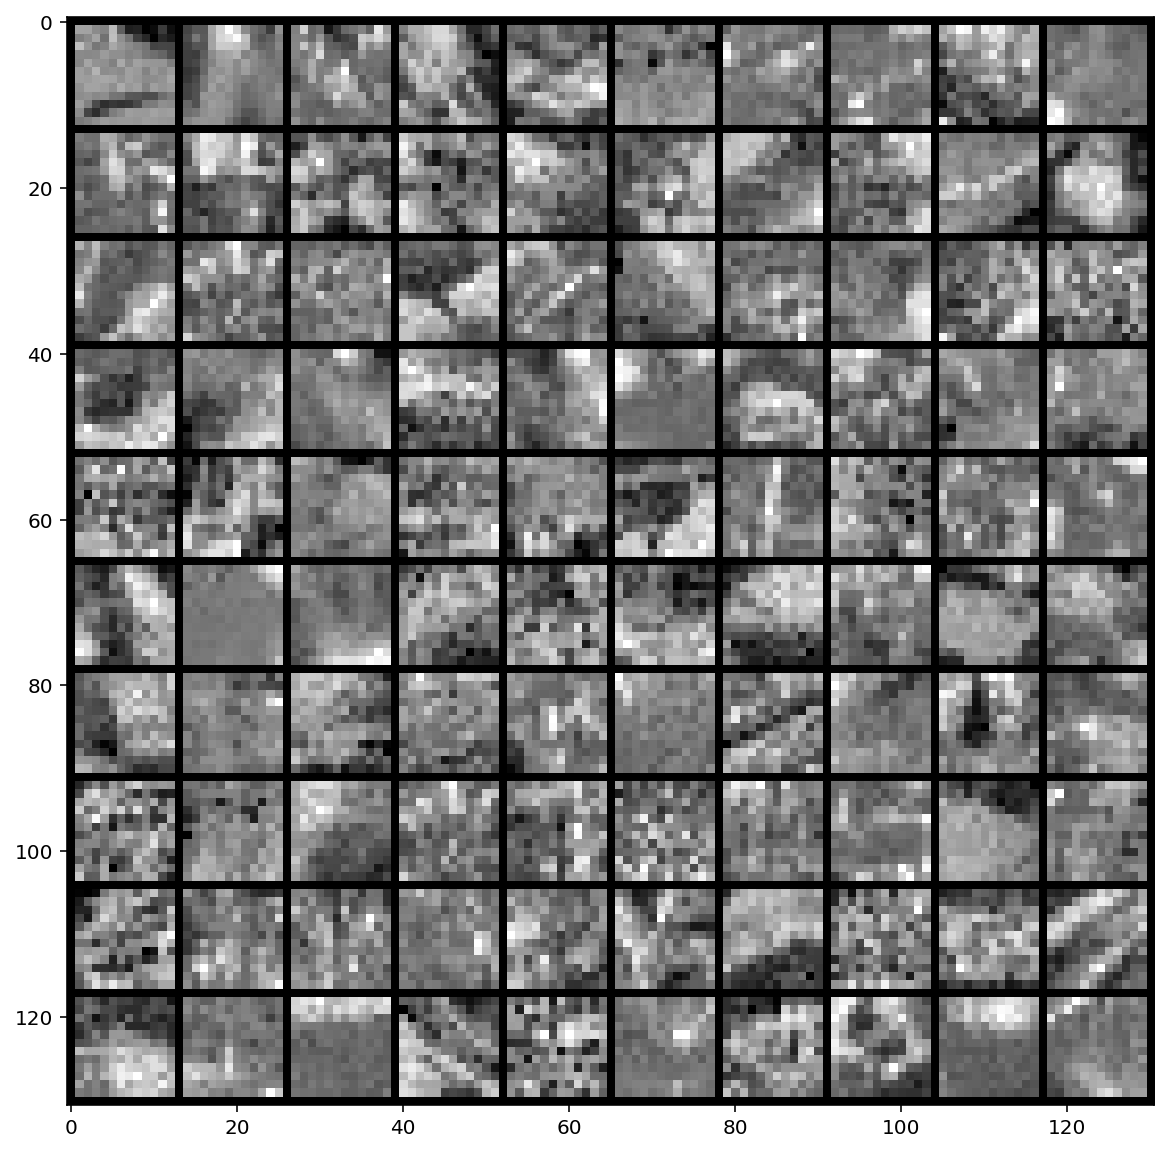

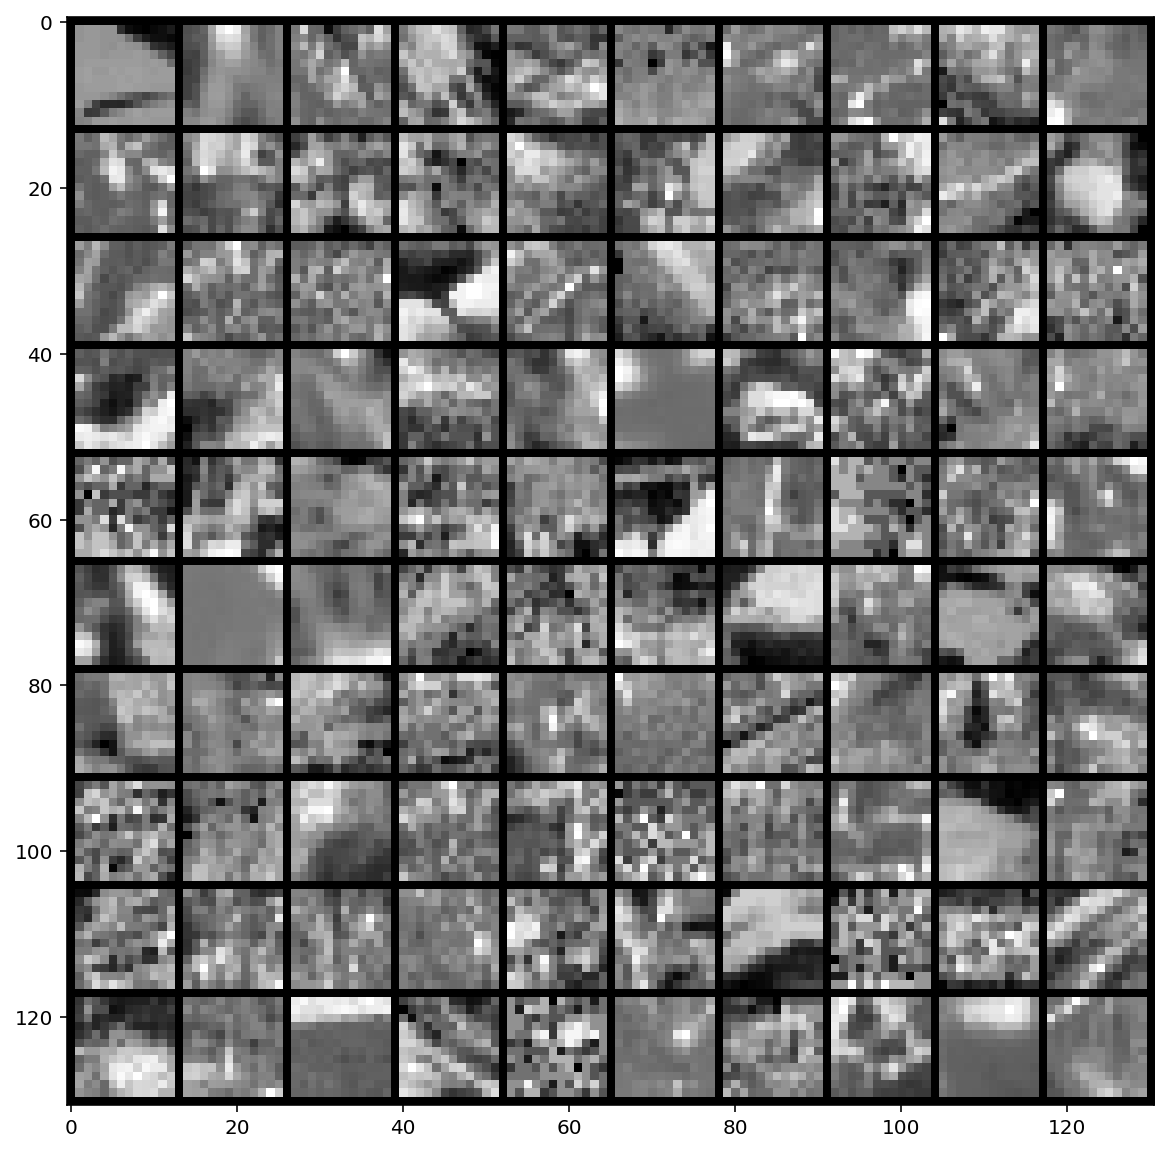

In [19]:
pZCAwhite = pPCAwhite.dot(U)

samples = pZCAwhite[sample_index, :]
display_patches(samples, num_rows, num_cols, padding_size)

# 原图
plt.figure()
samples = patches[sample_index, :]
display_patches(samples, num_rows, num_cols, padding_size)